In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [9]:
yt = pd.read_csv('USvideos_modified.csv', encoding='latin1')
yt.head()

C:\Users\fajar\AppData\Local\Temp\ipykernel_20016\1351279078.py:1: DtypeWarning: Columns (0,1,2,5,10,11,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  yt = pd.read_csv('USvideos_modified.csv', encoding='latin1')


,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
0,2kyS6SvSYSE,20-11-2017,13-11-2017,17.0,category_id,CaseyNeistat,2564903.0,96321.0,7972.0,22149.0,...,False,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,7.0,7.0,2.0,2.0,1.0,9086142.0
1,1ZAPwfrtAFY,20-11-2017,13-11-2017,7.0,category_id,LastWeekTonight,6109402.0,151250.0,11508.0,19820.0,...,False,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",7.0,7.0,65.0,69.0,4.0,5937292.0
2,5qpjK5DgCt4,20-11-2017,12-11-2017,19.0,category_id,Rudy Mancuso,5315471.0,187303.0,7278.0,9990.0,...,True,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï...,7.0,8.0,68.0,426.0,23.0,4191209.0
3,puqaWrEC7tY,20-11-2017,13-11-2017,11.0,category_id,Good Mythical Morning,913268.0,16729.0,1386.0,2988.0,...,True,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,7.0,7.0,488.0,1246.0,28.0,13186408.0
4,d380meD0W0M,19-11-2017,12-11-2017,18.0,category_id,nigahiga,2819118.0,153395.0,2416.0,20573.0,...,True,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,6.0,7.0,488.0,1007.0,14.0,20563106.0


In [11]:
#showing info of data
yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   video_id                     4547 non-null     object 
 1   last_trending_date           4547 non-null     object 
 2   publish_date                 4547 non-null     object 
 3   publish_hour                 4547 non-null     float64
 4   category_id                  1048575 non-null  object 
 5   channel_title                4547 non-null     object 
 6   views                        4547 non-null     float64
 7   likes                        4547 non-null     float64
 8   dislikes                     4547 non-null     float64
 9   comment_count                4547 non-null     float64
 10  comments_disabled            4547 non-null     object 
 11  ratings_disabled             4547 non-null     object 
 12  tag_appeared_in_title_count  4547 non-null

In [13]:
#description of youtube
yt.describe()

,publish_hour,views,likes,dislikes,comment_count,tag_appeared_in_title_count,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
count,4547.000000,4.547000e+03,4.547000e+03,4.547000e+03,4.547000e+03,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4.525000e+03
mean,13.503189,1.265665e+06,3.919696e+04,2.616788e+03,4.938788e+03,2.961293,4.830658,34.429954,130.335386,437.941060,19.209369,3.164303e+06
std,6.548420,4.526133e+06,1.419793e+05,3.662803e+04,3.110122e+04,2.482547,2.614707,247.514298,150.400756,616.584168,12.452361,4.831613e+06
min,0.000000,5.590000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,8.000000,9.089650e+04,1.486000e+03,7.600000e+01,2.260000e+02,1.000000,3.000000,5.000000,22.000000,68.000000,9.000000,2.466470e+05
50%,15.000000,3.188400e+05,7.397000e+03,2.910000e+02,8.540000e+02,3.000000,5.000000,6.000000,85.000000,217.000000,18.000000,1.198769e+06
75%,18.000000,1.006673e+06,2.557550e+04,1.023000e+03,2.862500e+03,4.000000,7.000000,7.000000,151.000000,515.000000,29.000000,3.766915e+06
max,23.000000,1.493761e+08,3.093544e+06,1.674420e+06,1.361580e+06,18.000000,14.000000,4215.000000,488.000000,3644.000000,69.000000,2.867694e+07


In [18]:
#showing shape of data
yt.shape

(1048575, 23)

In [15]:
#removing duplicates and cleaning data
yt_clean=yt.drop_duplicates()
cleaned_shape=yt_clean.shape
yt_clean,cleaned_shape

(         video_id last_trending_date publish_date  publish_hour  category_id  \
 0     2kyS6SvSYSE         20-11-2017   13-11-2017          17.0  category_id   
 1     1ZAPwfrtAFY         20-11-2017   13-11-2017           7.0  category_id   
 2     5qpjK5DgCt4         20-11-2017   12-11-2017          19.0  category_id   
 3     puqaWrEC7tY         20-11-2017   13-11-2017          11.0  category_id   
 4     d380meD0W0M         19-11-2017   12-11-2017          18.0  category_id   
 ...           ...                ...          ...           ...          ...   
 4543  _CFJ1u-DIBc         05-03-2018   02-03-2018          19.0  category_id   
 4544  Juad74hE6rs         05-03-2018   01-03-2018          16.0  category_id   
 4545  n_S8d_1KVhU         05-03-2018   01-03-2018          18.0  category_id   
 4546  Eouvsy8JdLU         05-03-2018   27-02-2018          16.0  category_id   
 4547          NaN                NaN          NaN           NaN  category_id   
 
               channel_tit

In [ ]:
# Download the vader lexicon if not already available
nltk.download('vader_lexicon')
# Initialize the VADER analyzer
analyzer = SentimentIntensityAnalyzer()
# Function to apply sentiment analysis
def get_sentiment(text):
    if pd.isna(text): 
        return {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}
    return analyzer.polarity_scores(str(text))
# Apply to 'title' and 'tags'
title_sentiment = yt['title'].apply(get_sentiment).apply(pd.Series)
tags_sentiment = yt['tags'].apply(get_sentiment).apply(pd.Series)
# Rename columns for clarity
title_sentiment.columns = [f"title_{col}" for col in title_sentiment.columns]
tags_sentiment.columns = [f"tags_{col}" for col in tags_sentiment.columns]
# Combine with original dataframe
sentiment_df = pd.concat([yt, title_sentiment, tags_sentiment], axis=1)
print ("Sentiment Analysis",font=24)
# Show summary statistics
print(sentiment_df[['title_neg', 'title_neu', 'title_pos', 'title_compound',
                    'tags_neg', 'tags_neu', 'tags_pos', 'tags_compound']].describe())

In [41]:
import sqlite3
#checkin the data
print(yt[['category_id', 'views']].head())
# connect and load  to SQLite
conn = sqlite3.connect(":memory:")
yt.to_sql("videos", conn, index=False, if_exists='replace')
#sql query
query="""
SELECT category_id, 
       AVG(views) AS avg_views
FROM videos
GROUP BY category_id
ORDER BY avg_views DESC
"""
#execute query
avg_views_df = pd.read_sql_query(query, conn)
#show result
print(avg_views_df)

   category_id      views
0  category_id  2564903.0
1  category_id  6109402.0
2  category_id  5315471.0
3  category_id   913268.0
4  category_id  2819118.0
   category_id     avg_views
0  category_id  1.265665e+06


In [47]:
print(yt[['video_id', 'last_trending_date', 'publish_date']].head())

      video_id last_trending_date publish_date
0  2kyS6SvSYSE         20-11-2017   13-11-2017
1  1ZAPwfrtAFY         20-11-2017   13-11-2017
2  5qpjK5DgCt4         20-11-2017   12-11-2017
3  puqaWrEC7tY         20-11-2017   13-11-2017
4  d380meD0W0M         19-11-2017   12-11-2017


C:\Users\fajar\AppData\Local\Temp\ipykernel_20016\3891254292.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_trending, x='last_trending_days', y='title', palette='viridis')


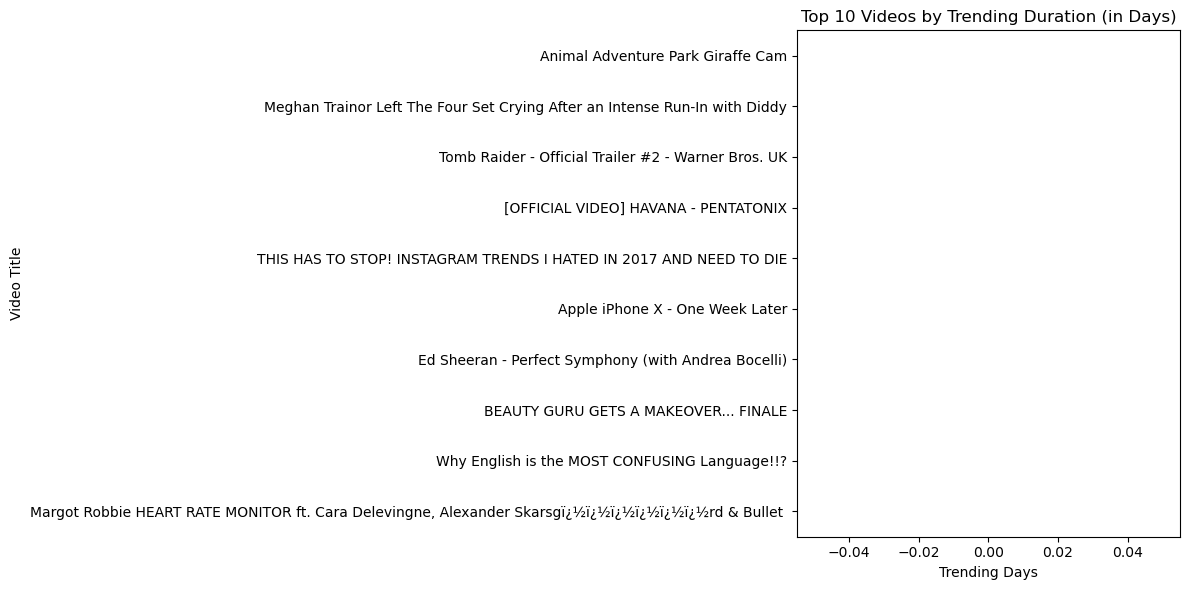

In [97]:
# Fix the date format first
yt['last_trending_date'] = pd.to_datetime(yt['last_trending_date'], format='%y.%m.%d', errors='coerce')

# Recalculate trending days
trending_duration = yt.groupby('video_id')['last_trending_date'].nunique().reset_index()
trending_duration.columns = ['video_id', 'last_trending_days']

# Merge titles
video_titles = yt[['video_id', 'title', 'category_id']].drop_duplicates(subset='video_id')
trending_duration = trending_duration.merge(video_titles, on='video_id', how='left')

# Sort using the correct column name
top_trending = trending_duration.sort_values(by='last_trending_days', ascending=False).head(10)

# Plot again
plt.figure(figsize=(12, 6))
sns.barplot(data=top_trending, x='last_trending_days', y='title', palette='viridis')
plt.title('Top 10 Videos by Trending Duration (in Days)')
plt.xlabel('Trending Days')
plt.ylabel('Video Title')
plt.tight_layout()
plt.show()


In [95]:
print(yt[['video_id', 'last_trending_date']].head(10))
print(yt['last_trending_date'].dropna().unique())


      video_id last_trending_date
0  2kyS6SvSYSE                NaT
1  1ZAPwfrtAFY                NaT
2  5qpjK5DgCt4                NaT
3  puqaWrEC7tY                NaT
4  d380meD0W0M                NaT
5  gHZ1Qz0KiKM                NaT
6  39idVpFF7NQ                NaT
7  nc99ccSXST0                NaT
8  jr9QtXwC9vc                NaT
9  TUmyygCMMGA                NaT
<DatetimeArray>
[]
Length: 0, dtype: datetime64[ns]
